# Movie Genres Classification

### Author :- @YogeshNile https://bit.ly/2Ky3ho6

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('kaggle_movie_train.csv')

In [5]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [6]:
df.shape

(22579, 3)

In [7]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


## Visualizing the count of 'genre' column from the dataset

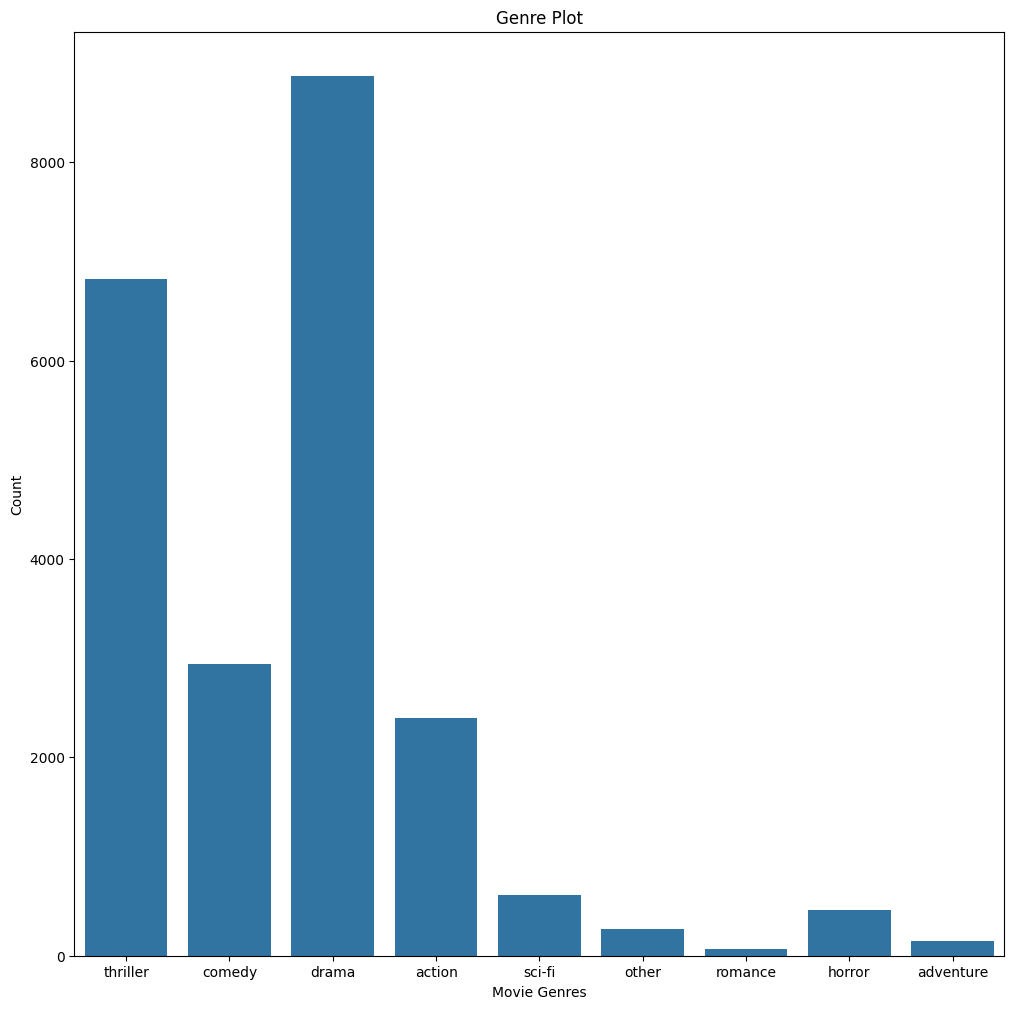

In [8]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# Data Cleaning and Preprocessing

In [9]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

## Mapping the genres to values

In [10]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3,
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [11]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [12]:
df.drop('id', axis=1, inplace=True)

## Cleaning the text

In [13]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from joblib import Parallel, delayed

# Fetch English stopwords once outside the function
english_stopwords = set(stopwords.words('english'))

# Function for text cleaning and preprocessing
def preprocess_text(text, stopwords):
    ps = PorterStemmer()
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text.lower())  # Cleaning special characters and converting to lowercase
    words = word_tokenize(dialog)  # Tokenizing using NLTK's word_tokenize
    words = [ps.stem(word) for word in words if word not in stopwords]  # Stemming and removing stopwords
    return ' '.join(words)

# Process texts in parallel
corpus = Parallel(n_jobs=-1)(delayed(preprocess_text)(text, english_stopwords) for text in df['text'])

# Now 'corpus' will contain the preprocessed texts


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
corpus[0:2]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look got ta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gue

In [15]:
len(corpus)

22579

In [16]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

## Creating wordcloud for drama genre

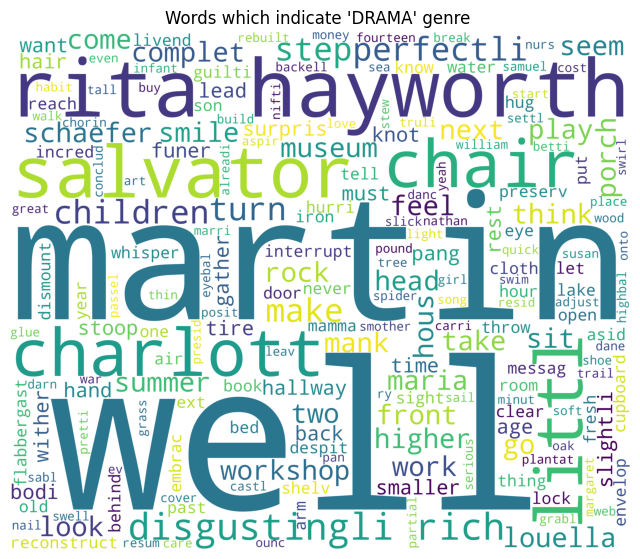

In [17]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

## Creating wordcloud for action genre

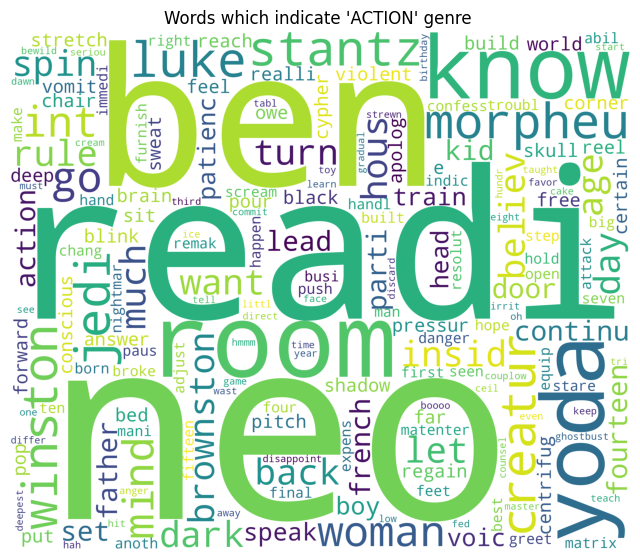

In [18]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

## Creating wordcloud for comedy genre

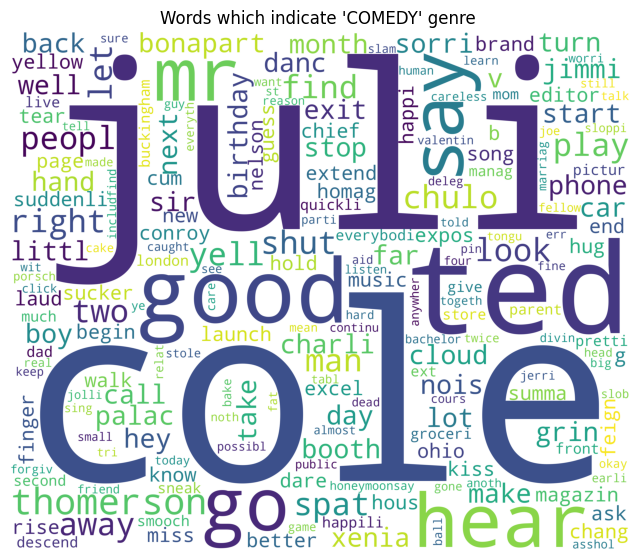

In [19]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

## Creating the Bag of Words model

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [21]:
y = df['genre'].values

## Model Building

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## Fitting Naive Bayes to the Training set

In [23]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

# Calculating Accuracy
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score for Naive Bayes is: {}%".format(round(score1*100,2)))

# Adding additional classifiers

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=1000, random_state=0)
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)
lr_score = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy: {}%".format(round(lr_score*100,2)))

# Support Vector Machine Classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_score = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy: {}%".format(round(svm_score*100,2)))

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)
knn_score = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy: {}%".format(round(knn_score*100,2)))


---- Score ----
Accuracy score for Naive Bayes is: 89.39%
Logistic Regression Accuracy: 91.54%
SVM Accuracy: 90.46%
KNN Accuracy: 81.78%


## Predicting the Test set results

In [25]:
nb_y_pred = nb_classifier.predict(X_test)

## Calculating Accuracy

In [26]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.39%


# Predictions

In [27]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

In [28]:
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [29]:
test.shape

(5589, 2)

In [30]:
test.drop('id', axis=1, inplace=True)

## Loading test dataset

## Predicting values

In [31]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  on tape If you wish. pause You're not wearing any underwear. CYNTHIA voice on tape Do you like the way I look? GRAHAM voice on tape Yes. CYNTHIA voice On tape Do you think I'm pretty? GRAHAM voice on tape Yes. CYNTHIA voice on tape Prettier than Ann? GRAHAM voice on tape Different. INT. CYNTHIA BISHOP'S APARTMENT DAY Cynthia and John are having sex. CYNTHIA to Graham, voice on tape John doesn't have sex with Ann anymore. GRAHAM voice On tape Is that what he tells you? CYNTHIA voice on tape He doesn't have to tell me. Cynthia has an intense orgasm. She rolls off of John, sweating. JOHN Jesus Christ. You are on fire today. Cynthia smiles. CYNTHIA Yes. You can go now. DOCTOR voice over If you won't talk to me, I can't help you. A moment of silence. John is starting to put his clothes on. Cynthia lies in bed, her eyes closed, her face serene. ANN voice over I hate my sister. INT. DOCTOR'S OFFICE DAY DOCTOR Why? ANN rambling Because all she thinks about are these guys she's after a

In [33]:
# Define accuracy scores
score1 = 0.8939
lr_score = 0.9154
svm_score = 0.9046
knn_score = 0.8178

# Define a dictionary to store accuracy scores for each classifier
accuracy_scores = {
    'Naive Bayes': score1,
    'Logistic Regression': lr_score,
    'SVM': svm_score,
    'KNN': knn_score,
}

# Find the classifier with the highest accuracy
best_classifier = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_classifier]

# Print the accuracy scores for all classifiers
print("Accuracy Scores:")
for classifier, score in accuracy_scores.items():
    print(f"{classifier}: {score*100:.2f}%")

# Print the classifier with the highest accuracy
print(f"\nThe best classifier is {best_classifier} with an accuracy of {best_accuracy*100:.2f}%")


Accuracy Scores:
Naive Bayes: 89.39%
Logistic Regression: 91.54%
SVM: 90.46%
KNN: 81.78%

The best classifier is Logistic Regression with an accuracy of 91.54%
